In [1]:
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2024-05-05 13:30:45--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.30.151, 16.182.69.145, 54.231.132.105, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.30.151|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  55.2MB/s    in 7.5s    

2024-05-05 13:30:53 (32.3 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [2]:
!unzip -o annotations_trainval2017.zip 

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [37]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from PIL import Image
import requests
from pycocotools.coco import COCO
import skimage.io as io


In [20]:
coco_annotation_file_path = "annotations/instances_val2017.json"

In [21]:
coco_annotation = COCO(annotation_file=coco_annotation_file_path)

loading annotations into memory...
Done (t=0.50s)
creating index...
index created!


In [22]:
cat_ids = coco_annotation.getCatIds()
print(f"Number of unique categoris: {len(cat_ids)}")

Number of unique categoris: 80


In [23]:
cat_ids[:5]

[1, 2, 3, 4, 5]

In [24]:
cats = coco_annotation.loadCats(cat_ids)

In [25]:
cats[:5]

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}]

In [26]:
cat_names = [cat['name'] for cat in cats] #cats is a list of dict

In [27]:
cat_names[:5]

['person', 'bicycle', 'car', 'motorcycle', 'airplane']

In [28]:
img_ids = coco_annotation.getImgIds(cat_ids[:5])


In [29]:
img_ids

[1, 2, 3, 4, 5]

In [30]:
img = COCO.loadImgs(0)

In [43]:
catIds = coco_annotation.getCatIds(catNms=['person','dog','skateboard'])
print(f"catids: {catIds}")
imgIds = coco_annotation.getImgIds(catIds=catIds )
print(f"imgids: {imgIds}")
imgIds = coco_annotation.getImgIds(imgIds = [324158])
print(f"IMG ids: {imgIds}")
img = coco_annotation.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img

catids: [1, 18, 41]
imgids: [549220, 324158, 279278]
IMG ids: [324158]


{'license': 1,
 'file_name': '000000324158.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg',
 'height': 334,
 'width': 500,
 'date_captured': '2013-11-19 23:54:06',
 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg',
 'id': 324158}

In [35]:
img

{'license': 1,
 'file_name': '000000324158.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg',
 'height': 334,
 'width': 500,
 'date_captured': '2013-11-19 23:54:06',
 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg',
 'id': 324158}

In [39]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

/tmp/ipykernel_41816/3549251028.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


loading annotations into memory...
Done (t=0.39s)
creating index...
index created!
loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
http://images.cocodataset.org/val2017/000000294695.jpg


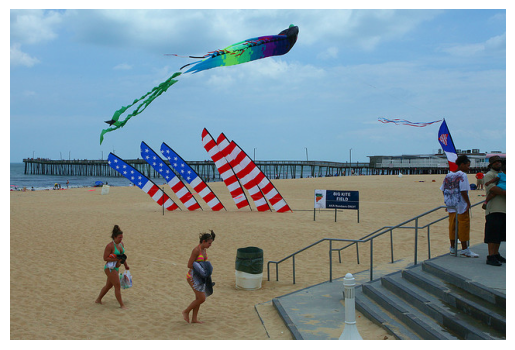

two girls walk off the windy beach while a kite flies overhead
A couple of beautiful women walking on a beach under a kite.
There are 2 girls walking on the beach and a kite in the sky.
People on a beach with a colored windsock and American flag colored windsocks.
Two women leaving a beach with kites flying in the background.


In [3]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
%matplotlib inline

captions_annFile = "annotations/captions_val2017.json"
coco_annotation_file_path = "annotations/instances_val2017.json"

coco = COCO(coco_annotation_file_path)
coco_caps = COCO(captions_annFile)
ids = list(coco.anns.keys())
# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)